# STOCK MARKET ANALYSIS

In this project, we'll take a look at MAANG stocks. The reputable companies that form the acronym “MAANG” include Meta Platforms Inc(NASDAQ: META), Amazon.com Inc (NASDAQ: AMZN), Apple Inc (NASDAQ: AAPL), Netflix Inc (NASDAQ: NFLX), and Google LLC (NASDAQ: GOOGL). 

The five MAANG companies combined account for approximately 21% of the S&P 500 and about 40% of the Nasdaq 100 Index. All five of the FAANG companies ought to be more profitable than their rivals thanks to their intangible assets. Google, Amazon, and Meta all have access to vast amount of user data which can be used to target ads. With the shift to original content and exclusive licences, Netflix has created an unmatchable content library. One of the rare firms that produces both the hardware and software for its products is Apple, and it is undoubtedly the only one of this size.

So let's see how these stocks have performed in the last 365 days by leveraging data analysis skills with python.

We'll take a look at the following pointers in this analysis:

1. Change in price of the stock over time


2. Daily return of the stock on average


3. Moving average of the various stocks


4. Correlation between different stocks' daily returns


5. Correlation between different stocks' closing prices


But first, let's import all the necessary libraries for this analysis.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import data
from datetime import datetime

import yfinance as yf

Now that all the libraries and packages are imported successfully, let's get on with the analysis. 

## Data Preparation

We'll create a list of stock tickers of 'MAANG' companies, and then download stock data of the last 365 days, from Yahoo Finance.

In [2]:
# list of MAANG stock tickers
tech_list=["META", "AMZN", "AAPL", "NFLX", "GOOGL"]

# current date
end=datetime.now()
                                     
# date exactly an year ago
start= datetime(end.year -1, end.month, end.day)

# loop to download stock data of each ticker 
for stock in tech_list:
    # set dataframe's name as stock ticker name
    globals()[stock]=yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's check the structure of each of these new dataframes. 

In [3]:
META.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [7]:
GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


By visual observation, we deduce that all these 5 dataframes- META, AAPL, AMZN, NFLX, GOOGL- have equal amount of records, number of fields as well as the field names. And since there are no NaN values, there is no need for cleaning data.

Before proceeding further with the analysis, let's take a look at stock market jargon that occurs in each of our dataframes.

1. Open: price from the first transaction of a day


2. High:  highest price at which a stock traded during that day; typically higher than the closing or equal to the opening               price         


3. Low: lowest price that at which a stock traded during that day


4. Close: last price at which a stock a stock is traded during that day


5. Adj Close: amends a stock's closing price to reflect that stock's value after accounting for any corporate actions; factors               in stock splits, dividends, and rights offerings


6. Volume: total number of shares traded in a day; includes every share that is bought and sold during the day

                   
Now that we know what the fields of the dataframe look like, let's get on with the analysis.

## Analysis

Firstly, let's use the describe method to compute the summary statistics of each MAANG ticker.

In [8]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,200.752510,204.585857,197.090837,200.615977,200.615977,3.450889e+07
std,67.903624,68.655394,66.955194,67.828013,67.828013,2.412410e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,1.059330e+07
25%,160.330002,162.415001,157.150002,159.979996,159.979996,2.221835e+07
50%,187.850006,192.830002,184.779999,187.470001,187.470001,2.846840e+07
75%,220.680000,224.715004,217.354996,221.410004,221.410004,3.838590e+07
max,346.910004,352.709991,345.200012,346.220001,346.220001,2.323166e+08


In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,157.928207,160.122749,155.879243,158.081554,157.533152,9.096708e+07
std,12.892462,12.713261,12.926639,12.822542,12.613115,2.624464e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,3.519590e+07
25%,147.135002,149.724998,145.135002,147.985001,147.760033,7.340550e+07
50%,158.979996,161.000000,155.800003,157.960007,157.698410,8.654860e+07
75%,169.385002,171.065002,167.300003,169.060005,168.490730,1.026748e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


In [10]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,134.229934,136.387428,131.755953,133.998486,133.998486,7.464706e+07
std,23.974710,23.872198,23.903040,23.884785,23.884785,3.410922e+07
min,89.470001,89.480003,85.870003,86.139999,86.139999,3.508860e+07
25%,113.884998,116.160000,112.439999,114.060001,114.060001,5.377745e+07
50%,133.410004,135.470001,132.100006,133.270004,133.270004,6.472600e+07
75%,155.553001,157.801247,151.600250,154.556496,154.556496,8.464415e+07
max,178.175003,179.800003,176.574997,178.078506,178.078506,2.726620e+08


In [11]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,315.206574,321.145179,308.115060,314.447411,314.447411,1.027251e+07
std,137.072123,137.298864,134.616226,135.378731,135.378731,1.118444e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,215.389999,224.775002,211.580002,217.285004,217.285004,5.239250e+06
50%,249.800003,251.990005,247.509995,249.300003,249.300003,7.683800e+06
75%,384.150009,389.610001,373.369995,382.195007,382.195007,1.197950e+07
max,668.200012,675.380005,658.289978,663.840027,663.840027,1.333875e+08


In [12]:
GOOGL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,119.852647,121.466859,118.149325,119.740070,119.740070,3.477244e+07
std,16.740599,16.656547,16.523734,16.595984,16.595984,1.361336e+07
min,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,107.550003,109.424999,105.959503,107.821251,107.821251,2.610800e+07
50%,116.327499,118.079002,114.870003,116.650002,116.650002,3.245870e+07
75%,135.796745,136.744751,133.118004,135.086754,135.086754,3.992900e+07
max,151.250000,151.546494,147.169495,148.186493,148.186493,1.232000e+08


Now that we've summarised our stock ticker dataframes, let's do some visualizations. 

#### 1. Volume traded 

Let's start with plotting the volume of each ticker traded throughout the year.

<AxesSubplot:title={'center':'Volume of META'}, xlabel='Date'>

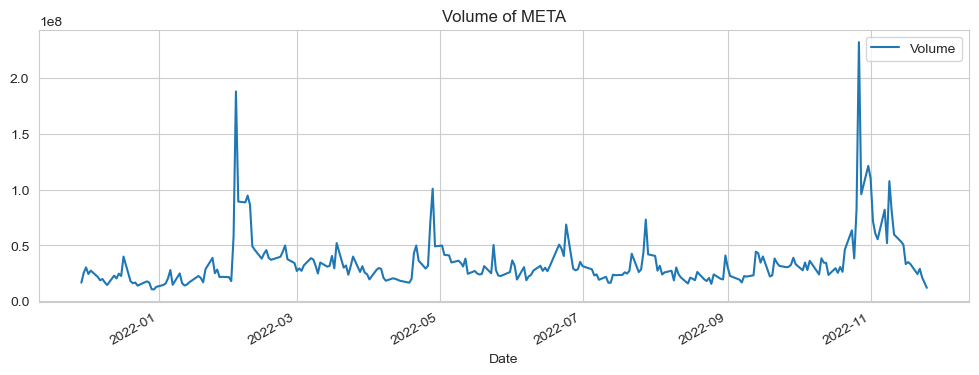

In [13]:
META['Volume'].plot(legend=True, figsize=(12,4), title='Volume of META')

META stocks were being traded heavily around the month of November of 2022. While the rest of year was pretty dormant, anothe peak in the volume of stocks traded came in February of 2022. Up next, Volume traded plot of AMZN.

<AxesSubplot:title={'center':'Volume of AMZN'}, xlabel='Date'>

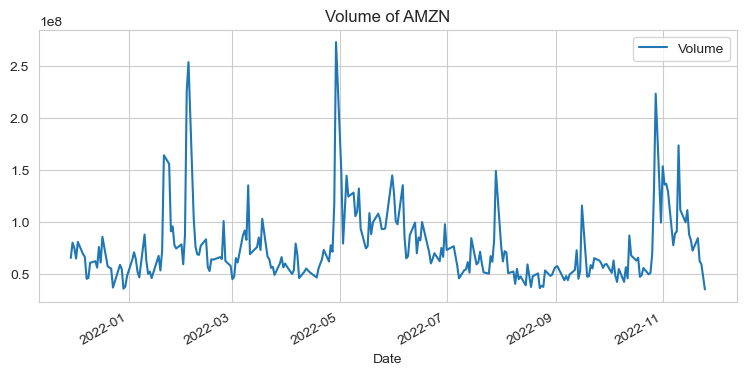

In [14]:
AMZN['Volume'].plot(legend=True, figsize=(9,4), title='Volume of AMZN')

We observe that AMZN stocks were pretty hot around Feb, May and November of 2022, while dipped significantly during Dec of '21 and Sep and Oct months of '22. Now let's take a look at AAPL.

<AxesSubplot:title={'center':'Volume of AAPL'}, xlabel='Date'>

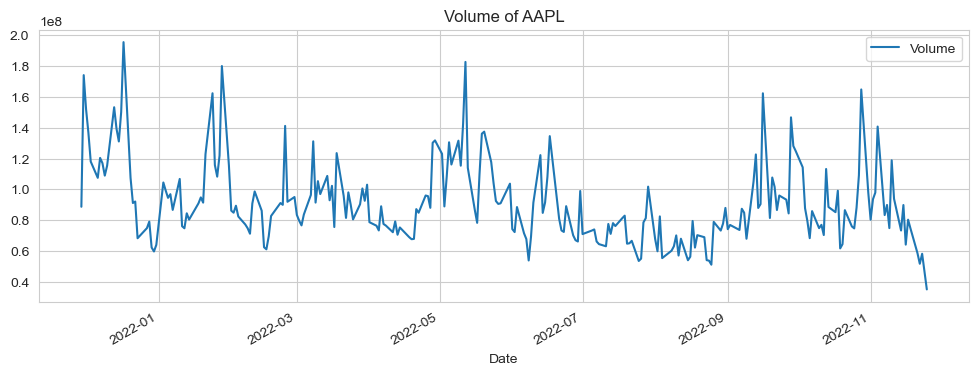

In [15]:
AAPL['Volume'].plot(legend=True, figsize=(12,4), title='Volume of AAPL')

<AxesSubplot:title={'center':'Volume of NFLX'}, xlabel='Date'>

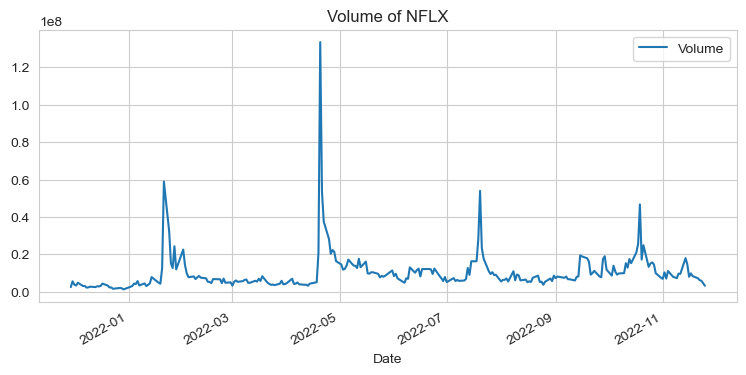

In [16]:
NFLX['Volume'].plot(legend=True, figsize=(9,4), title='Volume of NFLX')

NFLX stock doesn't have too many ups and downs in this plot, the highest volume of stocks traded came in April '22, with smaller peaks in Feb, Aug and Oct of '22. Next up is GOOGL.

<AxesSubplot:title={'center':'Volume of GOOGL'}, xlabel='Date'>

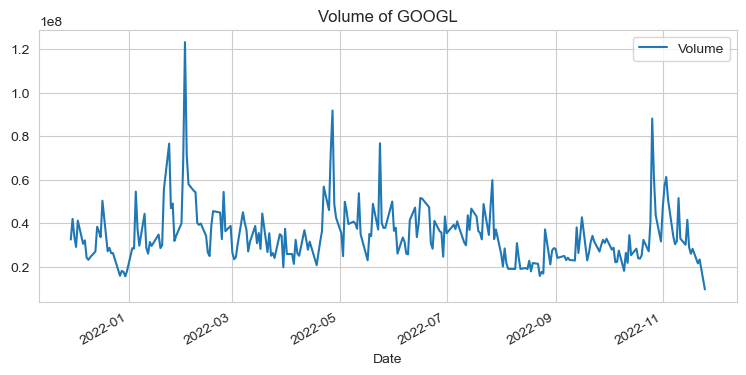

In [17]:
GOOGL['Volume'].plot(legend=True, figsize=(9,4), title='Volume of GOOGL')

GOOGL stock was most active in March and May of '22. 

#### 2. Adjusted Close

Let's plot the adjusted closing prices of each stock ticker throught the past year.

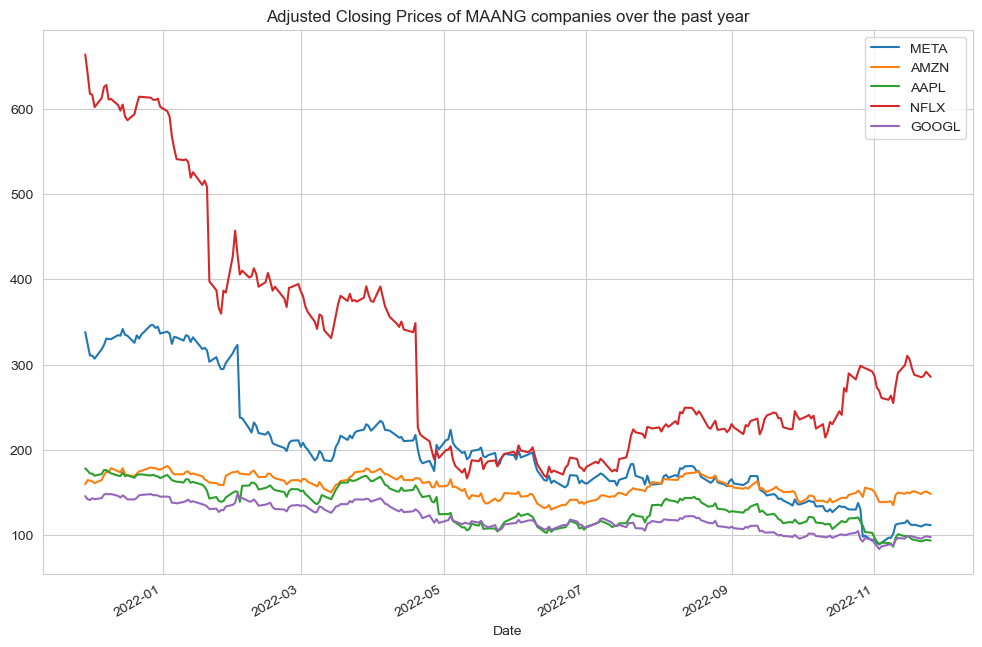

In [18]:
# Adjusted Closing Price of META
META['Adj Close'].plot(legend=True, figsize=(12,8), title='Adjusted Close of META')

# Adjusted Closing Price of AAPL
AAPL['Adj Close'].plot(legend=True, figsize=(12,8))

# Adjusted Closing Price of AMZN
AMZN['Adj Close'].plot(legend=True, figsize=(12,8))

# Adjusted Closing Price of NFLX
NFLX['Adj Close'].plot(legend=True, figsize=(12,8))

# Adjusted Closing Price of GOOGL
GOOGL['Adj Close'].plot(legend=True, figsize=(12,8))

plt.title("Adjusted Closing Prices of MAANG companies over the past year")

plt.legend(["META", "AMZN", "AAPL", "NFLX", "GOOGL"])

The adjusted closing price of NFLX has been always above that of the other 4 companies with only META crossing it once in April of '22. The adjusted closing price of AMZN, AAPL, GOOGL has been fairly similar throughout the year, with their peaks and troughs corresponding but obviously with a few exceptions here and there.


#### 3. Moving Average

So what is moving average afterall?

Simply put, a moving average is a statistic that captures the average change in a data series over time. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

This section covers the moving average of these companies, individually, over the course of 10, 20, 50 and 100 days. 

But first, we'll need to create one more field for calculating and storing the moving averages of the MAANG companies.

In [19]:
ma_day = [10,20,50, 100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    META[column_name]=META['Adj Close'].rolling(ma).mean()
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()
    AMZN[column_name]=AMZN['Adj Close'].rolling(ma).mean()
    NFLX[column_name]=NFLX['Adj Close'].rolling(ma).mean()
    GOOGL[column_name]=GOOGL['Adj Close'].rolling(ma).mean()

<AxesSubplot:title={'center':'Moving Averages of META'}, xlabel='Date'>

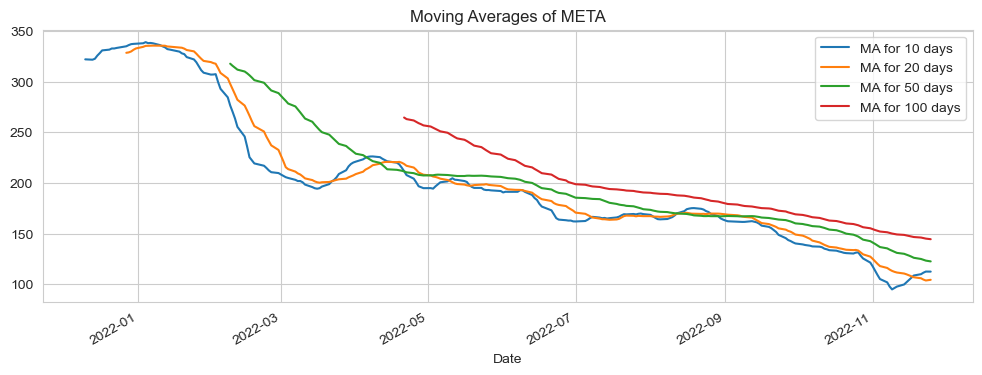

In [20]:
META[['MA for 10 days','MA for 20 days',
      'MA for 50 days', 'MA for 100 days']].plot(subplots=False,
                                                 figsize=(12,4),title= 'Moving Averages of META')

The moving average of META has been constantly declining during the past year. Let's see how AAPL's moving average has fared.

<AxesSubplot:title={'center':'Moving Averages of AAPL'}, xlabel='Date'>

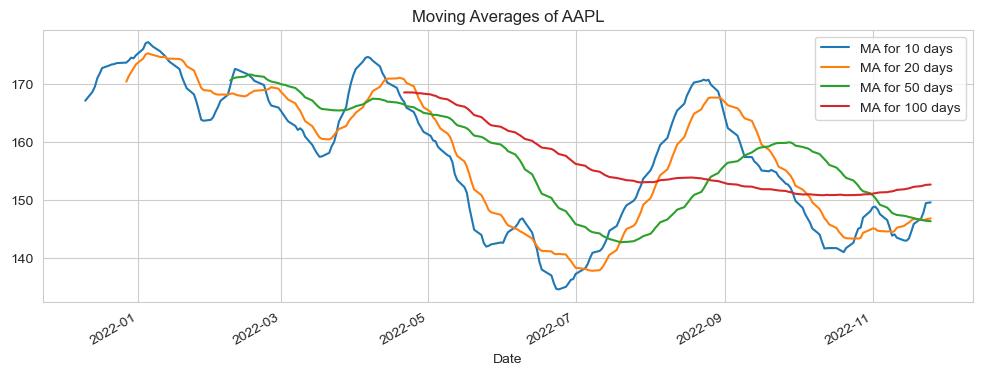

In [21]:
AAPL[['MA for 10 days','MA for 20 days',
      'MA for 50 days', 'MA for 100 days']].plot(subplots=False,
                                                 figsize=(12,4),title= 'Moving Averages of AAPL')

Moving average of AAPL has constantly fluctuated with several peaks and troughs. Let's take a look at the MA of AMZN.

<AxesSubplot:title={'center':'Moving Averages of AMZN'}, xlabel='Date'>

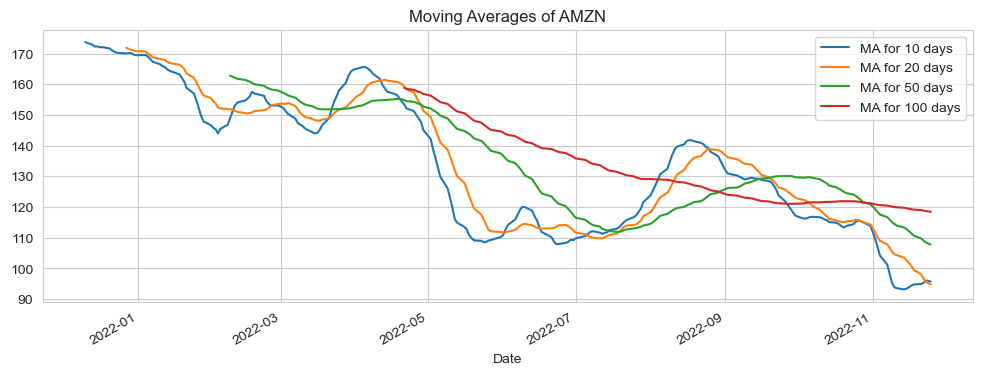

In [22]:
AMZN[['MA for 10 days','MA for 20 days',
      'MA for 50 days', 'MA for 100 days']].plot(subplots=False,
                                                 figsize=(12,4),title= 'Moving Averages of AMZN')

AMZN's moving average has constantly declined with occasional peaks and trough and currently is at a year's low. Up next is NFLX.

<AxesSubplot:title={'center':'Moving Averages of NFLX'}, xlabel='Date'>

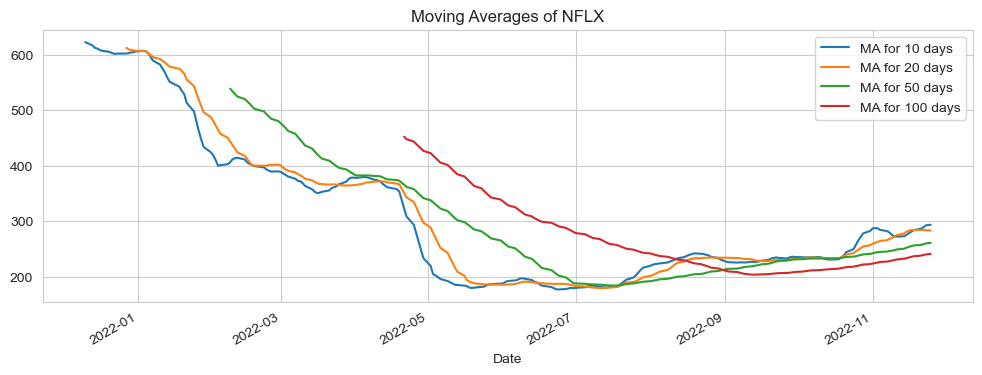

In [23]:
NFLX[['MA for 10 days','MA for 20 days',
      'MA for 50 days', 'MA for 100 days']].plot(subplots=False,
                                                figsize=(12,4),title= 'Moving Averages of NFLX')

After declining during the early months of the year, NFLX's MA has been on an upward trajectory since early Sep of '22. Let's move on to GOOGL then.

<AxesSubplot:title={'center':'Moving Averages of GOOGL'}, xlabel='Date'>

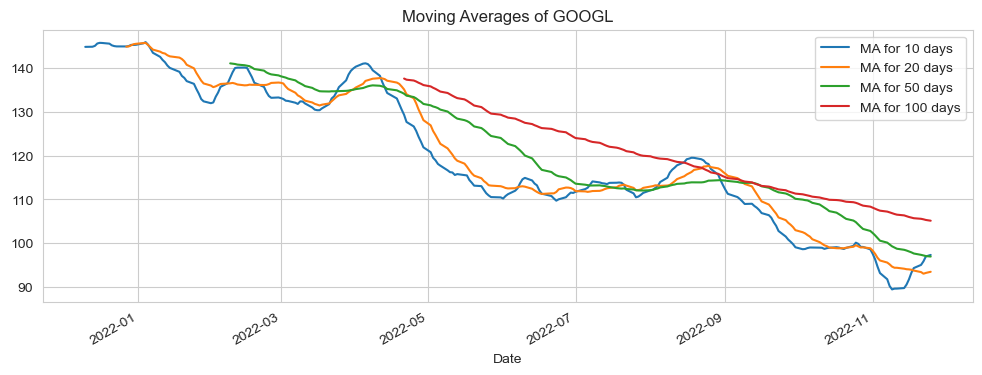

In [24]:
GOOGL[['MA for 10 days','MA for 20 days',
      'MA for 50 days', 'MA for 100 days']].plot(subplots=False,
                                                 figsize=(12,4),title= 'Moving Averages of GOOGL')

GOOGL's MA has been on a decline since the start of the year with occasional peaks and troughs. Moving ahead with analysis, we'll take a look at the dails returns of each stock.

#### 4. Daily Returns

We'll be calculating the daily returns of each company and plotting them separately as a percentage value and then plot the results. 

<AxesSubplot:title={'center':'Daily Return %age of META'}, xlabel='Date'>

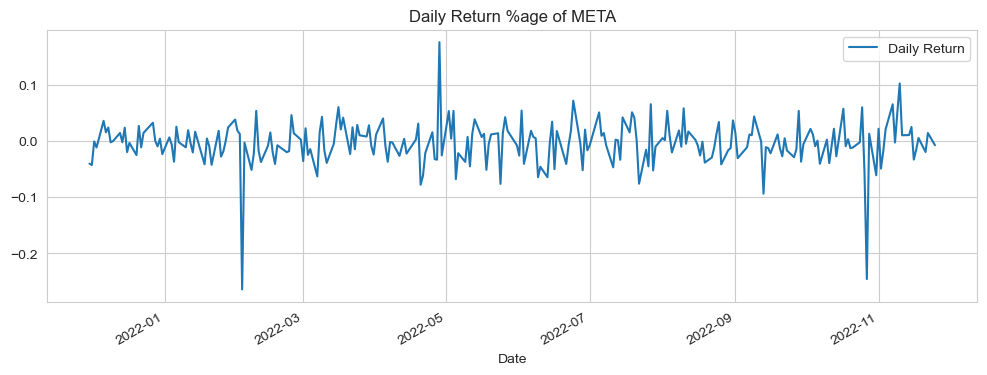

In [25]:
# We'll use pct_change to find the percent change for each day
META['Daily Return'] = META['Adj Close'].pct_change()
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
GOOGL['Daily Return'] = GOOGL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
META['Daily Return'].plot(figsize=(12,4),legend=True, title= 'Daily Return %age of META')


The daily returns of META have fluctuated round the year. The highest daily return came in April of '22, with almost a +20% daily return while the lowest daily return was in early March of '22, with a loss of over -25%. Let's check out AAPL's daily returns.

<AxesSubplot:title={'center':'Daily Return %age of AAPL'}, xlabel='Date'>

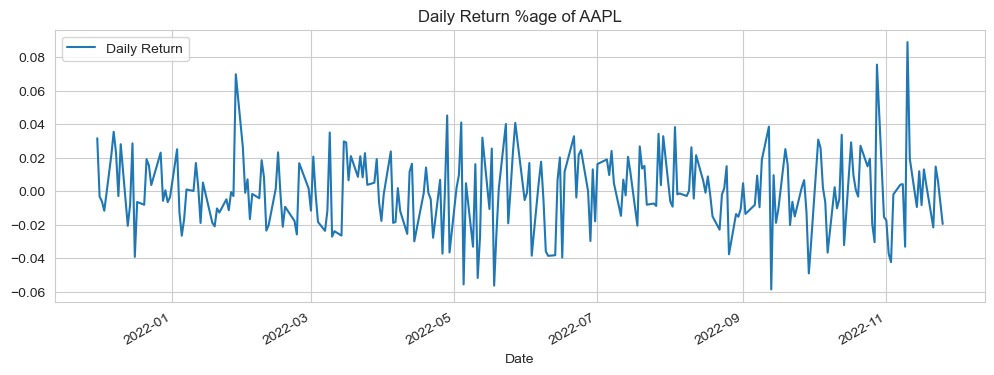

In [26]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True, title= 'Daily Return %age of AAPL')

AAPL's stock has been pretty volatile when it comes to daily returns. The daily returns high is as high as around +8.5%, while the lows are as low as -6%. Let's check out AMZN's daily returns.

<AxesSubplot:title={'center':'Daily Return %age of AMZN'}, xlabel='Date'>

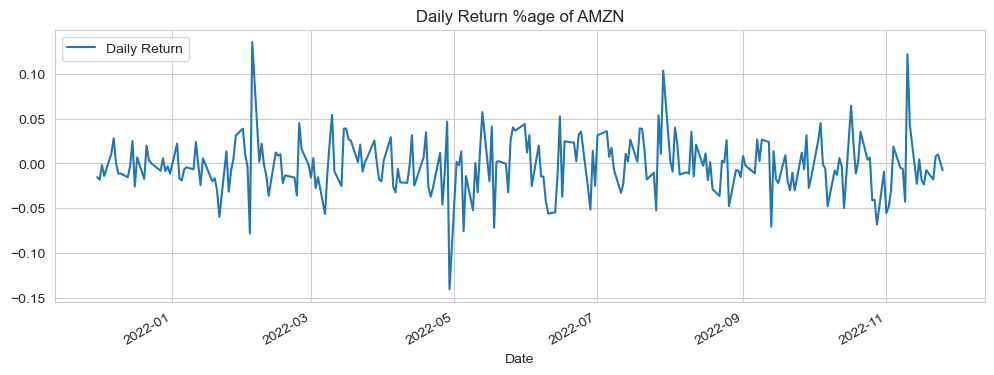

In [27]:
AMZN['Daily Return'].plot(figsize=(12,4),legend=True, title= 'Daily Return %age of AMZN')

The daily returns of AMZN have been confined to a range of 15% in highs and lows. The lowest daily return of around -14% was in the end of April '22, while the highest daily return was given during early March '22(over +15%). Now let's check out NFLX's daily returns.

<AxesSubplot:title={'center':'Daily Return %age of NFLX'}, xlabel='Date'>

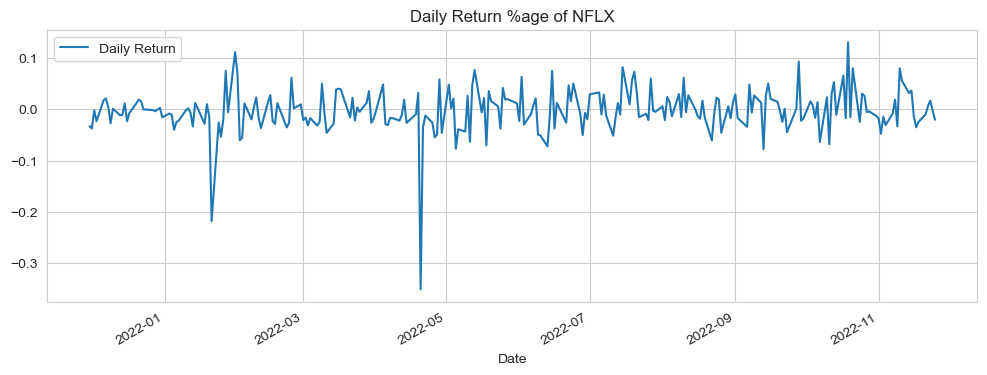

In [28]:
NFLX['Daily Return'].plot(figsize=(12,4),legend=True, title= 'Daily Return %age of NFLX')

NFLX gave the highest daily return(over +5%) in late October while in April, NFLX plunged to a -35% daily return. Let's see GOOGL's daily returns performance.

<AxesSubplot:title={'center':'Daily Return %age of GOOGL'}, xlabel='Date'>

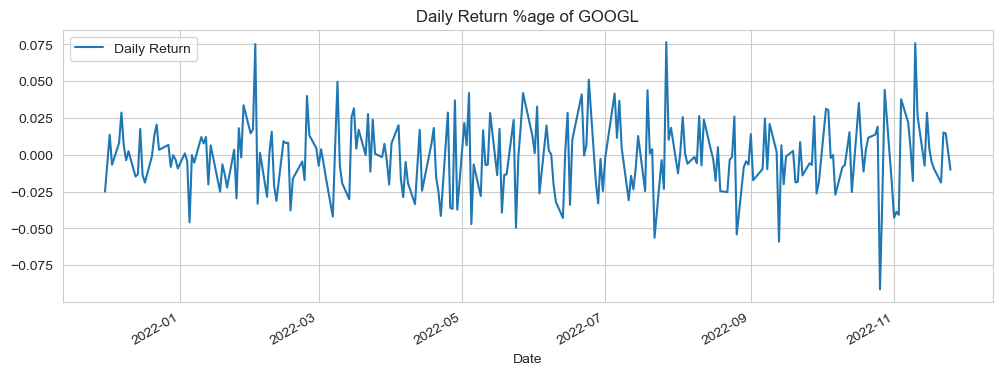

In [29]:
GOOGL['Daily Return'].plot(figsize=(12,4),legend=True, title= 'Daily Return %age of GOOGL')

GOOGL's lowest daily return of over -9% came in late Oct '22, while it gave the highest daily return of over +7.5% in late July of '22.
Now that we've visualized the daily returns as well, let's move on to finding out if there's a correlation in the daily returns of these companies. To do this, we'll first create a separate dataframe with the daily returns of all the companies and then plot their correlation using a scatter plot and determine their correlation coefficient using a correlation matrix.

[*********************100%***********************]  5 of 5 completed


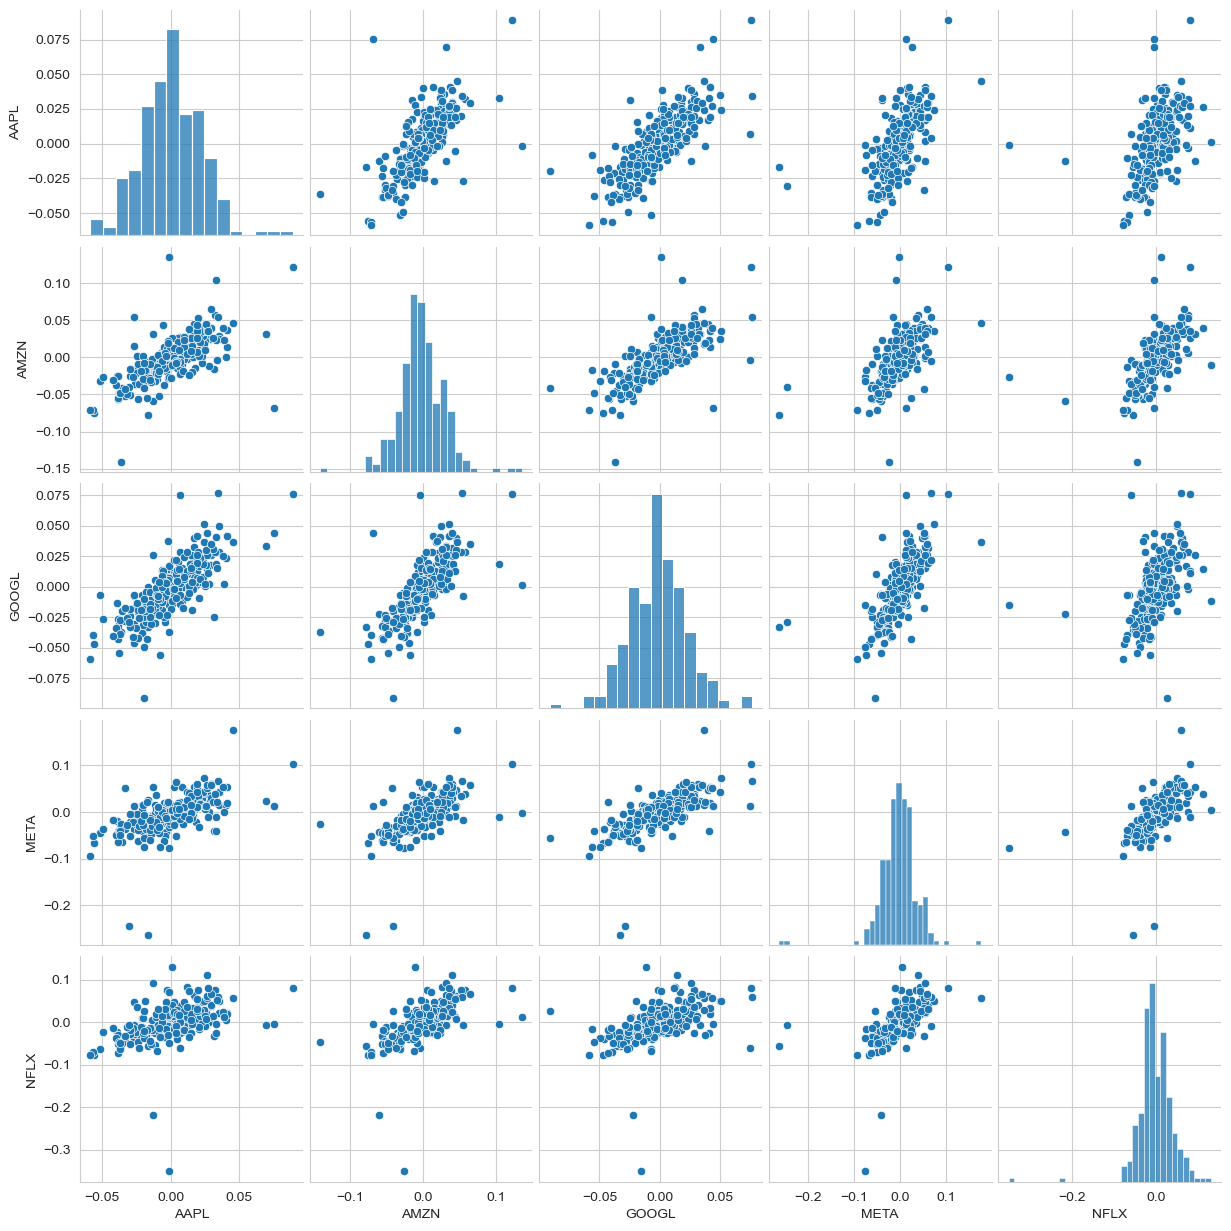

In [30]:
# dataframe with daily adjusted closing price of all companies 
stock_close = yf.download(tech_list, start, end)['Adj Close']

# dataframe calculating the daily returns of all companies 
stock_returns= stock_close.pct_change()

# plotting correlation plot of MAANG companies, taken 2 at a time
sns.pairplot(stock_returns.dropna())

A quick glance on this plot shows an interesting correlation between AMZN and GOOGL, and AAPL and GOOGL. Let's confirm this by plotting a correlation matrix.

<AxesSubplot:>

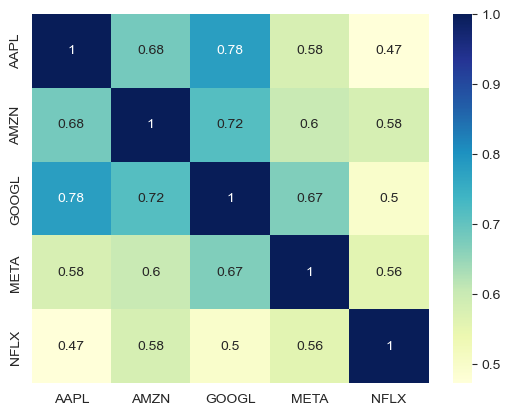

In [31]:
sns.heatmap(stock_returns.dropna().corr(), annot=True, cmap="YlGnBu")


As per our initial observations, GOOGL has a strong correlation with AAPL and AMZN for daily returns. We can use the same steps to create a correlation plot of the closing prices of these stocks.

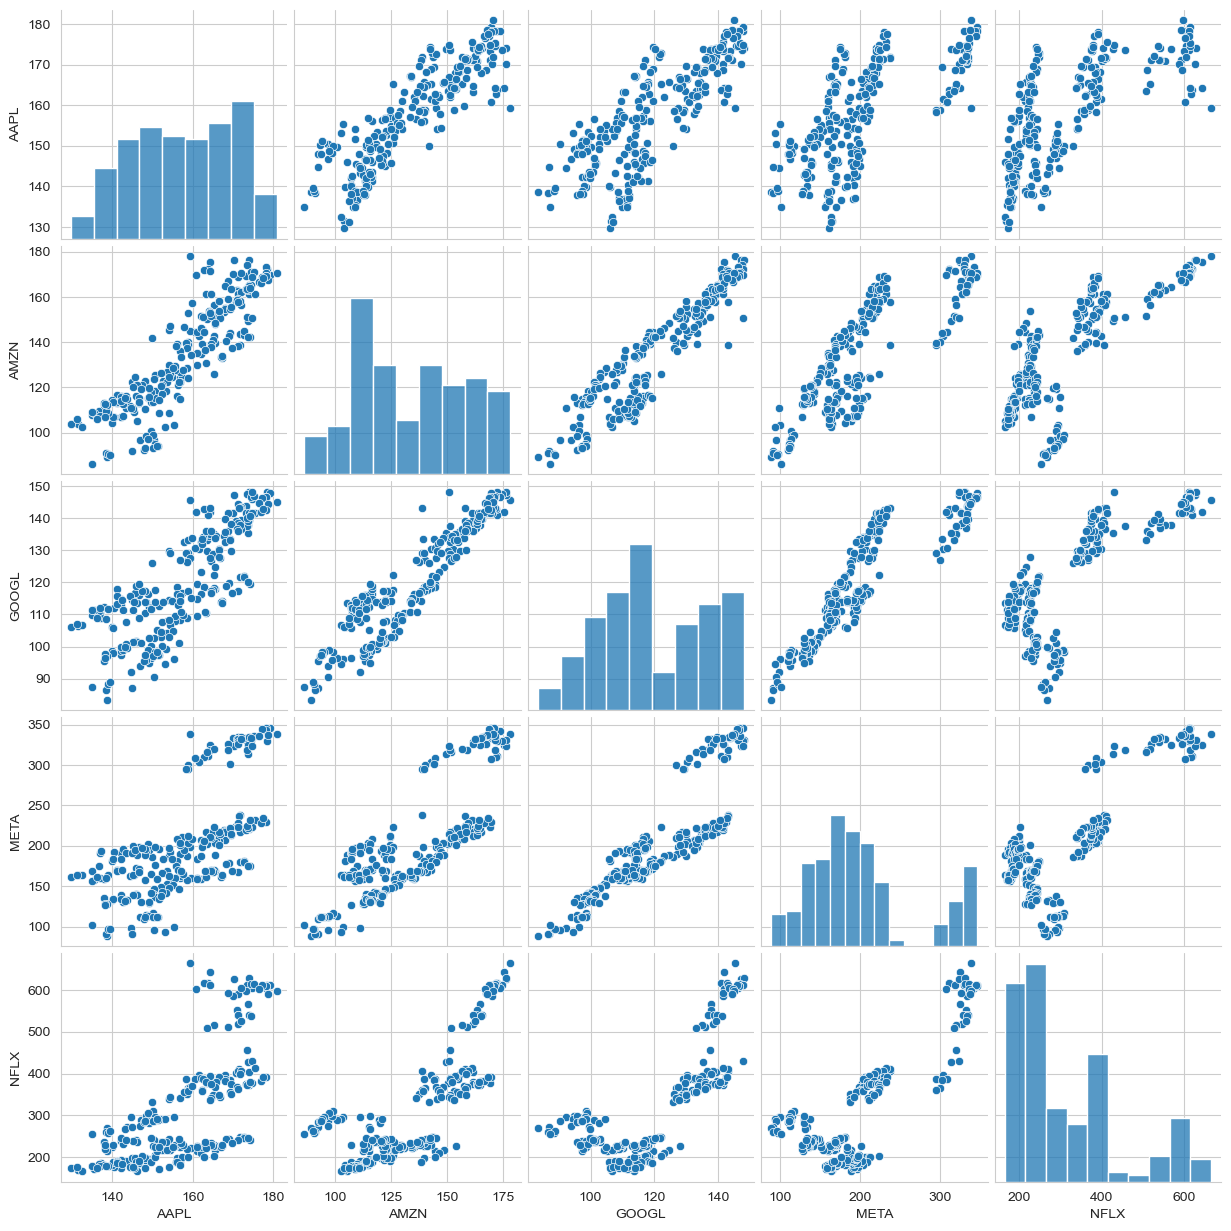

In [32]:
sns.pairplot(stock_close.dropna())

By visual observation, we see that there is a stong correlation between the closing prices of AMZN and GOOGL, and AMZN and AAPL. Let's plot a heatmap depicting Pearson R values of the same.

<AxesSubplot:>

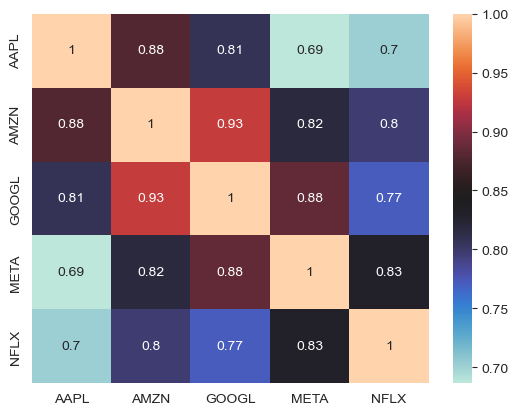

In [33]:
sns.heatmap(stock_close.dropna().corr(), annot=True, cmap="icefire")

Apart from our earlier findings, we also came across a high correlation between META and NFLX. 


## Summary

Before finishing up, let's summarise our findings:

1. META and AMZN have had the highest volume traded on a single day with around 2.8 billion stocks traded while GOOGL had the      lowest number of stocks traded on one day with 1.2 billion stocks


2. NFLX has had the highest Adjusted Close price among the MAANG companies. GOOGL ranks the lowest in this aspect


3. The Moving Average of all these companies has declined as the year went by, but as for NFLX, the MA is slowly picking up        pace. As for GOOGL, it's current MA is the lowest among the lot(around 105).


4. META had the highest single day daily return percentage with 17% in April of '22, while the lowest daily return was of -35%    (NFLX in Oct '22). META also had the 2nd lowest daily return percentage on a single day with -25%.
 
